In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
address = 'E:\\University Semester\\8\\Foundation of Computer Vision\\Homeworks\\HW4 - Histogram Equalization\\Oppenheimer.jpg'

In [3]:
gray_image = cv2.imread(address, cv2.IMREAD_GRAYSCALE)
gray_image.shape

(844, 1500)

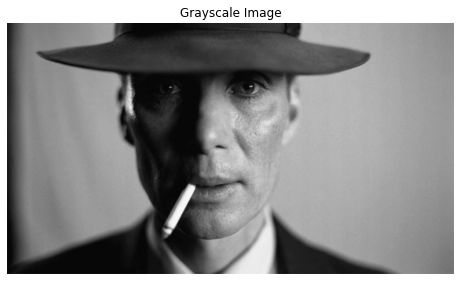

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [5]:
histogram = np.zeros(256)
for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
        histogram[gray_image[i][j]] += 1

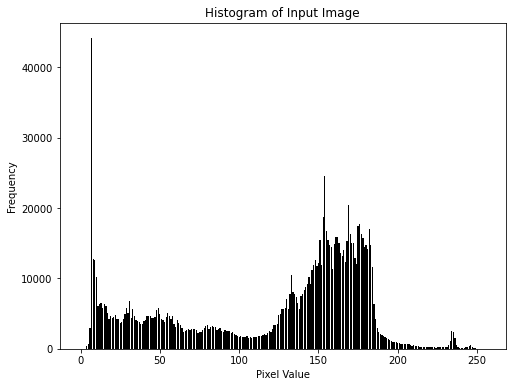

In [6]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(histogram)), histogram, color='black')
plt.title('Histogram of Input Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

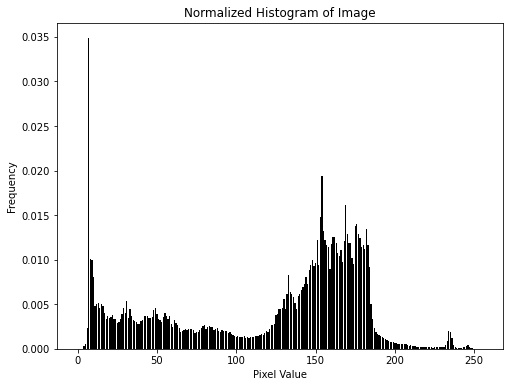

In [7]:
normalized_histogram = histogram / (gray_image.shape[0] * gray_image.shape[1])
plt.figure(figsize=(8, 6))
plt.bar(range(len(normalized_histogram)), normalized_histogram, color='black')
plt.title('Normalized Histogram of Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

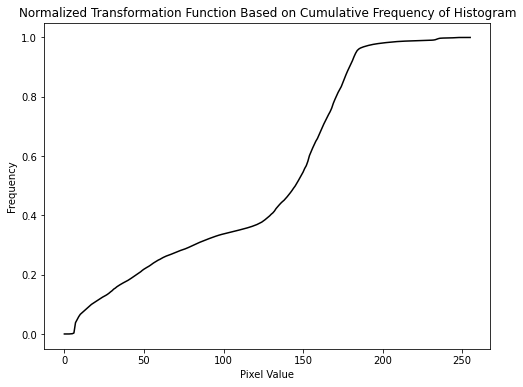

In [8]:
normalized_transformation_function = np.zeros(256) # Based on cumulative frequency
normalized_transformation_function[0] = normalized_histogram[0]
for i in range(1, normalized_transformation_function.shape[0]):
    normalized_transformation_function[i] = normalized_transformation_function[i - 1] + normalized_histogram[i]
plt.figure(figsize=(8, 6))
plt.plot(normalized_transformation_function, color='black')
plt.title('Normalized Transformation Function Based on Cumulative Frequency of Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

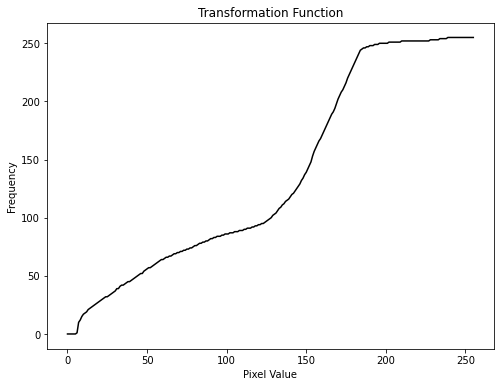

In [9]:
transformation_function = np.round(normalized_transformation_function * 255).astype(int)
plt.figure(figsize=(8, 6))
plt.plot(transformation_function, color='black')
plt.title('Transformation Function')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [10]:
transformed_image = np.zeros_like(gray_image)
for i in range(transformed_image.shape[0]):
    for j in range(transformed_image.shape[1]):
        transformed_image[i][j] = transformation_function[gray_image[i][j]]

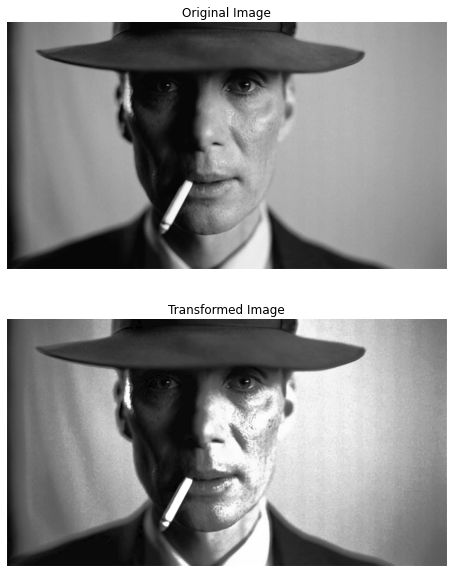

In [11]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(transformed_image, cmap='gray', vmin=0, vmax=255)
plt.title('Transformed Image')
plt.axis('off')

plt.show()

In [12]:
histogram = np.zeros(256)
for i in range(transformed_image.shape[0]):
    for j in range(transformed_image.shape[1]):
        histogram[transformed_image[i][j]] += 1

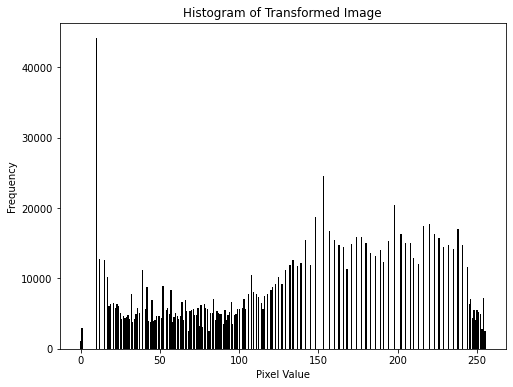

In [13]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(histogram)), histogram, color='black')
plt.title('Histogram of Transformed Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [15]:
matrix = [
    [1, 2, 2, 6, 5, 5, 6, 7, 3, 7],
    [1, 5, 6, 1, 2, 2, 2, 2, 7, 7],
    [2, 1, 6, 4, 2, 3, 4, 2, 4, 3],
    [3, 5, 3, 4, 4, 6, 6, 6, 6, 6],
    [4, 6, 7, 3, 4, 6, 5, 4, 5, 6],
    [6, 3, 2, 1, 7, 7, 4, 5, 6, 7],
    [2, 1, 6, 4, 2, 3, 4, 2, 4, 3],
    [1, 2, 2, 6, 5, 5, 6, 7, 3, 7],
    [4, 6, 7, 3, 4, 6, 5, 4, 5, 6],
    [6, 3, 2, 1, 7, 7, 4, 5, 6, 7]
]
matrix_array = np.array(matrix)

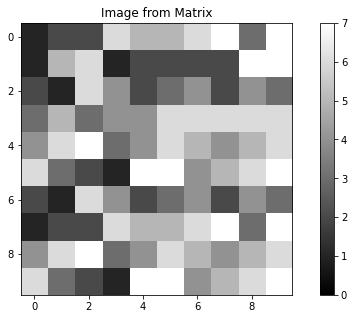

In [16]:
plt.figure(figsize=(10, 5))
plt.imshow(matrix_array, cmap='gray', vmin=0, vmax=7)
plt.title('Image from Matrix')
plt.colorbar()
plt.show()

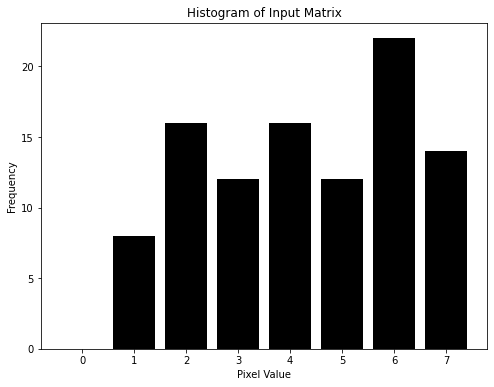

In [17]:
histogram = np.zeros(8)
for i in range(matrix_array.shape[0]):
    for j in range(matrix_array.shape[1]):
        histogram[matrix_array[i][j]] += 1
        
plt.figure(figsize=(8, 6))
plt.bar(range(len(histogram)), histogram, color='black')
plt.title('Histogram of Input Matrix')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

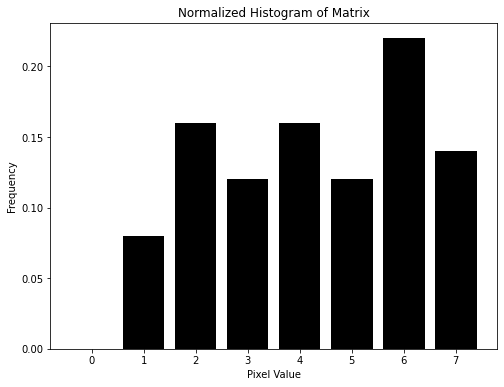

In [18]:
normalized_histogram = histogram / (matrix_array.shape[0] * matrix_array.shape[1])
plt.figure(figsize=(8, 6))
plt.bar(range(len(normalized_histogram)), normalized_histogram, color='black')
plt.title('Normalized Histogram of Matrix')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

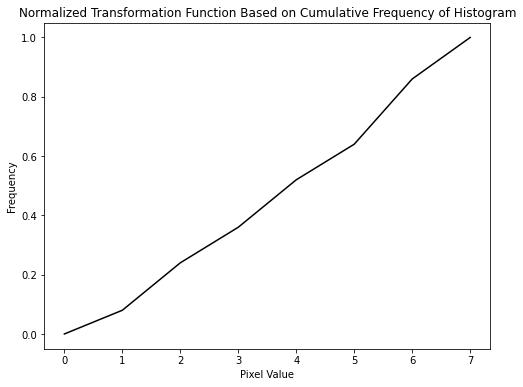

In [19]:
normalized_transformation_function = np.zeros(8) # Based on cumulative frequency
normalized_transformation_function[0] = normalized_histogram[0]
for i in range(1, normalized_transformation_function.shape[0]):
    normalized_transformation_function[i] = normalized_transformation_function[i - 1] + normalized_histogram[i]
plt.figure(figsize=(8, 6))
plt.plot(normalized_transformation_function, color='black')
plt.title('Normalized Transformation Function Based on Cumulative Frequency of Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

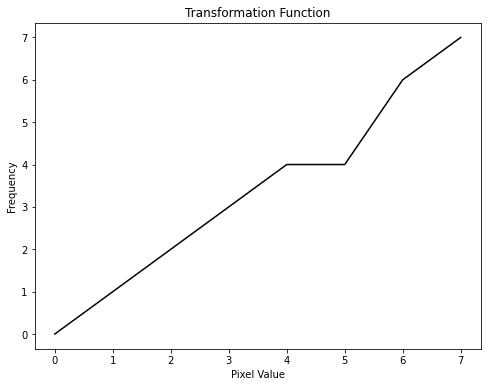

In [20]:
transformation_function = np.round(normalized_transformation_function * 7).astype(int)
plt.figure(figsize=(8, 6))
plt.plot(transformation_function, color='black')
plt.title('Transformation Function')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [21]:
transformed_matrix = np.zeros_like(matrix_array)
for i in range(transformed_matrix.shape[0]):
    for j in range(transformed_matrix.shape[1]):
        transformed_matrix[i][j] = transformation_function[matrix_array[i][j]]

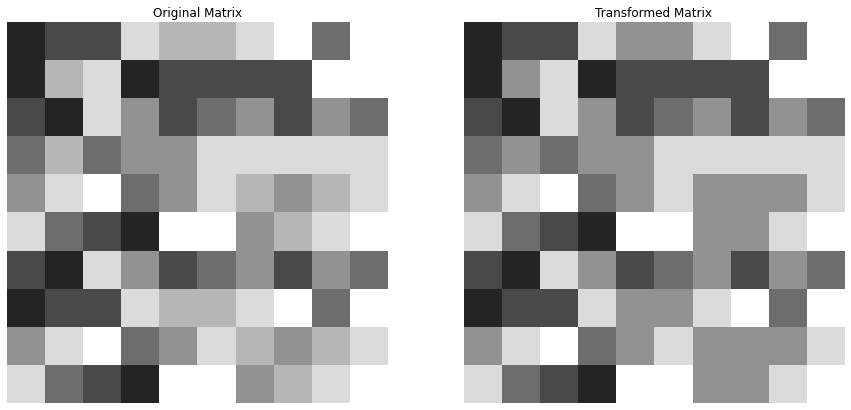

In [22]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(matrix_array, cmap='gray', vmin=0, vmax=7)
plt.title('Original Matrix')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_matrix, cmap='gray', vmin=0, vmax=7)
plt.title('Transformed Matrix')
plt.axis('off')

plt.show()

In [23]:
histogram = np.zeros(8)
for i in range(transformed_matrix.shape[0]):
    for j in range(transformed_matrix.shape[1]):
        histogram[transformed_matrix[i][j]] += 1

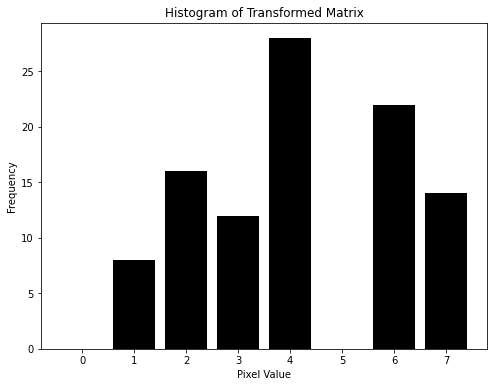

In [24]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(histogram)), histogram, color='black')
plt.title('Histogram of Transformed Matrix')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()